In [6]:
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [7]:
load_dotenv()
db_url = os.getenv("DATA_URL")

In [8]:
engine = create_engine(db_url)

In [9]:
query = """
SELECT
    DATE_TRUNC('month', startdatetime) AS month,
    COUNT(*) AS calls
FROM call_schema.call_data
GROUP BY month
ORDER BY month;
"""

In [10]:
monthly_calls = pd.read_sql(query, engine)
monthly_calls["month"] = pd.to_datetime(monthly_calls["month"])
monthly_calls.set_index("month", inplace=True)

In [11]:
monthly_calls

,calls
month,
2023-01-01,57871
2023-02-01,52043
2023-03-01,54822
2023-04-01,49935
2023-05-01,47810
2023-06-01,43944
2023-07-01,41282
2023-08-01,39631
2023-09-01,33387


In [12]:
calls_2023_2024 = monthly_calls.loc["2023":"2024"]
calls_2023_2024

,calls
month,
2023-01-01,57871
2023-02-01,52043
2023-03-01,54822
2023-04-01,49935
2023-05-01,47810
2023-06-01,43944
2023-07-01,41282
2023-08-01,39631
2023-09-01,33387


In [ ]:
pip install statsmodels

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    monthly_calls["calls"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

results = model.fit()
forecast = results.get_forecast(steps=24)
forecast_df = forecast.summary_frame()
forecast_df

C:\Users\learn\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\learn\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\learn\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


calls,mean,mean_se,mean_ci_lower,mean_ci_upper
2025-01-01,81149.411724,13131.743082,55411.668230,106887.155218
2025-02-01,75668.277371,13630.793592,48952.412849,102384.141892
2025-03-01,78607.790763,14237.654475,50702.500767,106513.080759
2025-04-01,74466.807796,14813.646669,45432.593844,103501.021747
2025-05-01,72178.892683,15368.320600,42057.537805,102300.247561
2025-06-01,74070.808522,15903.614429,42900.297017,105241.320027
2025-07-01,66446.124026,16421.418438,34260.735312,98631.512739
2025-08-01,64896.823638,16923.311782,31727.742046,98065.905230
2025-09-01,58991.907452,17410.633192,24867.693448,93116.121457
2025-10-01,57615.060649,17884.519092,22562.047347,92668.073951


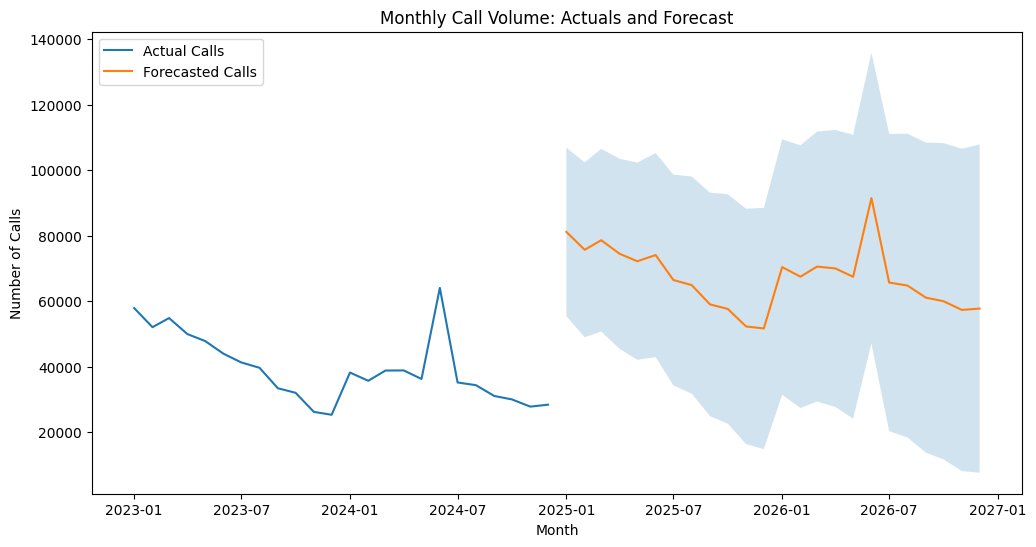

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_calls["calls"], label="Actual Calls")
plt.plot(forecast_df["mean"], label="Forecasted Calls")
plt.fill_between(
    forecast_df.index,
    forecast_df["mean_ci_lower"],
    forecast_df["mean_ci_upper"],
    alpha=0.2
)
plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.title("Monthly Call Volume: Actuals and Forecast")
plt.legend()
plt.show()